In [193]:
##load and clean up data
inputfile = "restaurant_menu_details_DA_copy.csv"
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')


In [194]:
#had to delete some malformed rows in the source file before loading was successful since pd.read_csv
#doesn't handle a string with quotes within the string even when the string is all in quotes
menu_df = pd.read_csv(inputfile)

/Users/rknatuahene/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [195]:
menu_df.shape  #current cut has 99k rows and 23 columns - restaurant menus from AL, AZ

(99027, 23)

In [196]:
menu_df.dtypes #Unnamed columns should not exist so will need to be cleaned up


uber_city            object
name                 object
food_category        object
priciness_level      object
ratings             float64
num_reviews         float64
sub_menu_title       object
dish_name            object
dish_description     object
price($)             object
street_address       object
local_city           object
state                object
zipcode              object
url                  object
Unnamed: 15          object
Unnamed: 16          object
Unnamed: 17          object
Unnamed: 18          object
Unnamed: 19          object
Unnamed: 20          object
Unnamed: 21          object
Unnamed: 22          object
dtype: object

In [198]:
menu_df.sample(15) #lots of NANs in unnamed columns

In [199]:
menu_df.isnull().sum(axis = 0)/menu_df.shape[0] #percentage of nulls in each column

uber_city           0.000000
name                0.000000
food_category       0.001565
priciness_level     0.001565
ratings             0.346138
num_reviews         0.346138
sub_menu_title      0.000000
dish_name           0.000000
dish_description    0.251972
price($)            0.000020
street_address      0.062165
local_city          0.062831
state               0.062276
zipcode             0.062438
url                 0.000858
Unnamed: 15         0.998041
Unnamed: 16         0.998687
Unnamed: 17         0.998990
Unnamed: 18         0.999455
Unnamed: 19         0.999626
Unnamed: 20         0.999859
Unnamed: 21         0.999939
Unnamed: 22         0.999980
dtype: float64

In [200]:
##we can remove columns where NaN ration > 50%
menu_df = menu_df.loc[:, (menu_df.isnull().sum(axis=0)/menu_df.shape[0] <= 0.5)]

In [201]:
menu_df.isnull().sum(axis = 0)/menu_df.shape[0] ##irst preprocessing gets rid of the unnamed columns

uber_city           0.000000
name                0.000000
food_category       0.001565
priciness_level     0.001565
ratings             0.346138
num_reviews         0.346138
sub_menu_title      0.000000
dish_name           0.000000
dish_description    0.251972
price($)            0.000020
street_address      0.062165
local_city          0.062831
state               0.062276
zipcode             0.062438
url                 0.000858
dtype: float64

In [202]:
##url being NaN is indicative of malformed row. 
# also all urls should start with the ubereats.com domain name
print(f'num of rows before filtering url column:{menu_df.shape[0]}')
menu_df = menu_df[menu_df["url"].notnull()]
menu_df = menu_df[menu_df["url"].str.startswith("https://www.ubereats.com")]
print(f'num of rows after filtering url column:{menu_df.shape[0]}')
print(menu_df.isnull().sum(axis = 0)/menu_df.shape[0]) ##after subsequent preprocessing

num of rows before filtering url column:99027
num of rows after filtering url column:98748
uber_city           0.000000
name                0.000000
food_category       0.001570
priciness_level     0.001570
ratings             0.346154
num_reviews         0.346154
sub_menu_title      0.000000
dish_name           0.000000
dish_description    0.252684
price($)            0.000000
street_address      0.062320
local_city          0.062978
state               0.062320
zipcode             0.062320
url                 0.000000
dtype: float64


In [203]:
##fillnas in text columns with '' before analysing.
menu_df['food_category'] = menu_df['food_category'].fillna('')
menu_df['priciness_level'] = menu_df['priciness_level'].fillna('')
menu_df['dish_description'] = menu_df['dish_description'].fillna('')
menu_df['street_address'] = menu_df['street_address'].fillna('')
menu_df['local_city'] = menu_df['local_city'].fillna('')
menu_df['state'] = menu_df['state'].fillna('')
menu_df['zipcode'] = menu_df['zipcode'].fillna('')

In [204]:
##make state all upper.  
##food category, sub_menu_title, dish_name, street_address, local_city should be a (uniform) title font
menu_df["state"] = menu_df["state"].str.upper()
menu_df["food_category"] = menu_df["food_category"].str.title()
menu_df["sub_menu_title"] = menu_df["sub_menu_title"].str.title()
menu_df["dish_name"] = menu_df["dish_name"].str.title()
menu_df["street_address"] = menu_df["street_address"].str.title()
menu_df["local_city"] = menu_df["local_city"].str.title()

In [189]:
menu_df.sample(15)

In [205]:
menu_df.dtypes

uber_city            object
name                 object
food_category        object
priciness_level      object
ratings             float64
num_reviews         float64
sub_menu_title       object
dish_name            object
dish_description     object
price($)             object
street_address       object
local_city           object
state                object
zipcode              object
url                  object
dtype: object

In [206]:
#price should also be a float64
menu_df["price($)"] = menu_df["price($)"].astype(str)
menu_df["price($)"] = menu_df["price($)"].apply(lambda x: x if re.match('^\d*[.]?\d*$', x) else np.nan)
menu_df = menu_df.astype({'price($)':'float64'})
menu_df.dtypes

uber_city            object
name                 object
food_category        object
priciness_level      object
ratings             float64
num_reviews         float64
sub_menu_title       object
dish_name            object
dish_description     object
price($)            float64
street_address       object
local_city           object
state                object
zipcode              object
url                  object
dtype: object

In [207]:
###Map ALABAMA to AL and ARIZONA to AZ
menu_df["state"] = menu_df["state"].apply(lambda x: 'AL' if re.match('ALABAMA', x) else x)
menu_df["state"] = menu_df["state"].apply(lambda x: 'AZ' if re.match('ARIZONA', x) else x)

In [208]:
####Insights - for business users
###states parsed and used for the subsequent analysis are Alabama(AL), Arizona(AZ)
###summarize menu items
#do arizona
state_name = "Arizona"

group_menu = (menu_df[menu_df.state == "AZ"]).groupby('sub_menu_title')
top_menus = group_menu.agg(['count','min','median','mean', 'max','std'])["price($)"].sort_values('count',ascending=False).head(10)
top_menus

#Insight 1: What are the top menu categories in the state of Arizona?
#           What are the summary statistics of menu prices of each of these top menu categories?
###Answers shown in a tabular form


,count,min,median,mean,max,std
sub_menu_title,,,,,,
Picked For You,2543,0.29,9.37,10.167782,65.00,6.460367
Sides,1955,0.25,2.99,3.229581,19.99,1.827887
Beverages,1488,0.99,2.49,2.782661,19.50,1.861455
Drinks,1464,0.00,2.75,2.785403,30.00,1.092491
Appetizers,1014,1.00,8.25,8.537268,50.00,3.681050
Mccafé,860,1.00,3.69,3.418756,4.69,0.819380
Burritos,695,1.17,6.99,6.499036,15.50,2.762783
Breakfast,688,2.10,5.63,5.816584,13.99,2.374087
Burgers,682,2.18,7.47,7.477331,18.29,3.643730


Text(0.5, 1.0, 'Boxplot of menu prices in Arizona grouped by sub menu names')

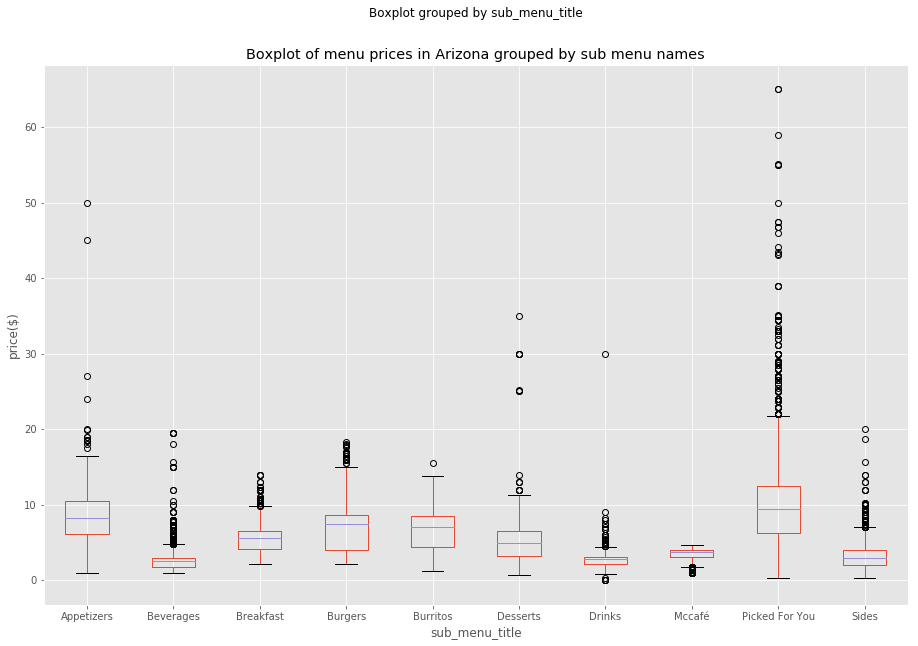

In [209]:
###get boxplot for top menus in AZ
top_menus_index = top_menus.index
menu_boxplot = menu_df[menu_df.state == "AZ"]
menu_boxplot = menu_boxplot[menu_boxplot.sub_menu_title.isin(top_menus_index)]
menu_boxplot = menu_boxplot[['sub_menu_title','price($)']]
menu_boxplot.boxplot(by="sub_menu_title", column='price($)', figsize=(15,10))
plt.ylabel('price($)')
plt.title(f'Boxplot of menu prices in {state_name} grouped by sub menu names')

#Insight 1: What are the top menu categories in the state of Arizona?
#           What are the summary statistics of menu prices of each of these top menu categories?
##answers shown via a graphical display - boxplot
##data shows the recommended menu items are most common but also most expensive on average.

/Users/rknatuahene/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rknatuahene/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/rknatuahene/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rknatuahene/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rknatuahene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` inste

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Menu Price($)')]

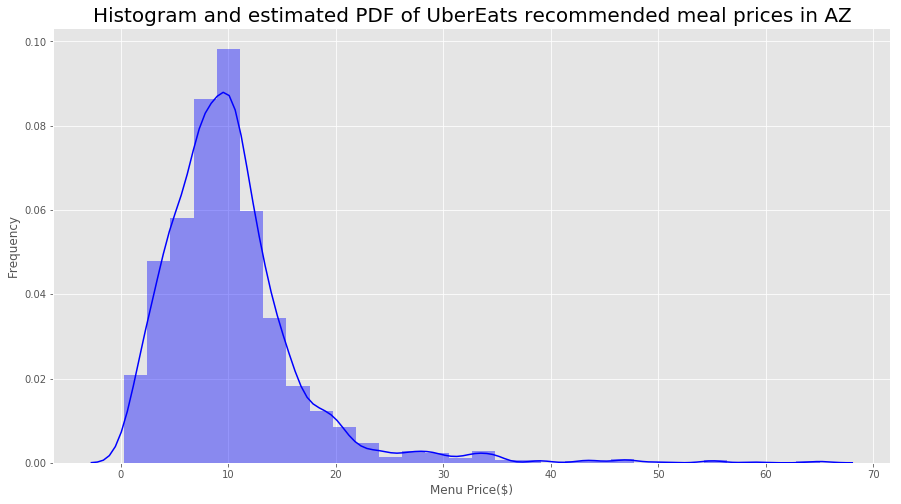

In [210]:
###Insight 2: Given the uberEats picks are generally most expensive, can you give more visibility into
##how recommended prices vary?
#Answer: histogram of prices of recommended meals in both states
fig_dims = (15, 8)
f, ax = plt.subplots(figsize=fig_dims)
hist_df = menu_boxplot[menu_boxplot.sub_menu_title == "Picked For You"]
sns.distplot(hist_df['price($)'], bins=30, color="b", ax=ax)
ax.set_title('Histogram and estimated PDF of UberEats recommended meal prices in AZ', fontsize=20)
ax.set(xlabel='Menu Price($)', ylabel='Frequency')

In [211]:
###Insights 1, 2 repeated for the state of Alabama
state_name = "Alabama"

group_menu = (menu_df[menu_df.state == "AL"]).groupby('sub_menu_title')
top_menus = group_menu.agg(['count','min','median','mean', 'max','std'])["price($)"].sort_values('count',ascending=False).head(10)
top_menus


,count,min,median,mean,max,std
sub_menu_title,,,,,,
Picked For You,2457,0.29,9.53,10.266378,62.00,6.153691
Beverages,2229,0.00,2.25,2.625406,14.95,1.698305
Sides,2178,0.00,2.89,3.129963,13.00,1.688068
Desserts,974,0.00,3.92,4.658172,49.50,3.526309
Meals,928,5.99,9.49,9.485690,12.99,1.523906
Mccafé,919,1.29,3.19,3.219532,4.47,0.595551
Drinks,726,0.28,2.40,2.755565,27.99,1.473372
All Sandwiches,711,3.79,6.69,7.426273,99.99,6.308860
Appetizers,707,0.79,7.95,8.129010,49.99,4.711157


Text(0.5, 1.0, 'Boxplot of menu prices in Alabama grouped by sub menu names')

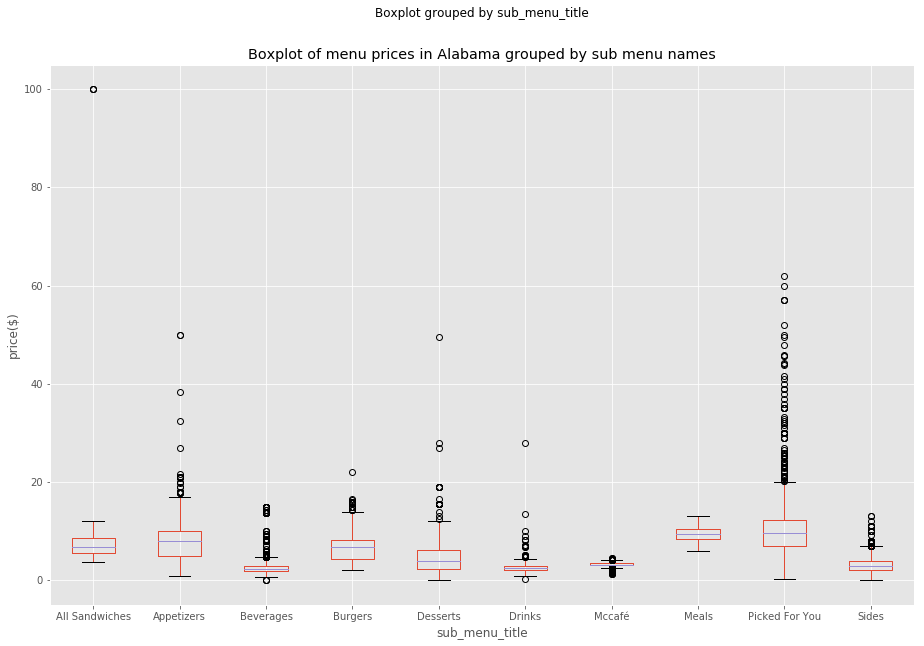

In [212]:
###Insights 1, 2 repeated for the state of Alabama
top_menus_index = top_menus.index
menu_boxplot = menu_df[menu_df.state == "AL"]
menu_boxplot = menu_boxplot[menu_boxplot.sub_menu_title.isin(top_menus_index)]
menu_boxplot = menu_boxplot[['sub_menu_title','price($)']]
menu_boxplot.boxplot(by="sub_menu_title", column='price($)', figsize=(15,10))
plt.ylabel('price($)')
plt.title(f'Boxplot of menu prices in {state_name} grouped by sub menu names')

###similar observation in AL regarding higher menu prices for recommended meals

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Menu Price($)')]

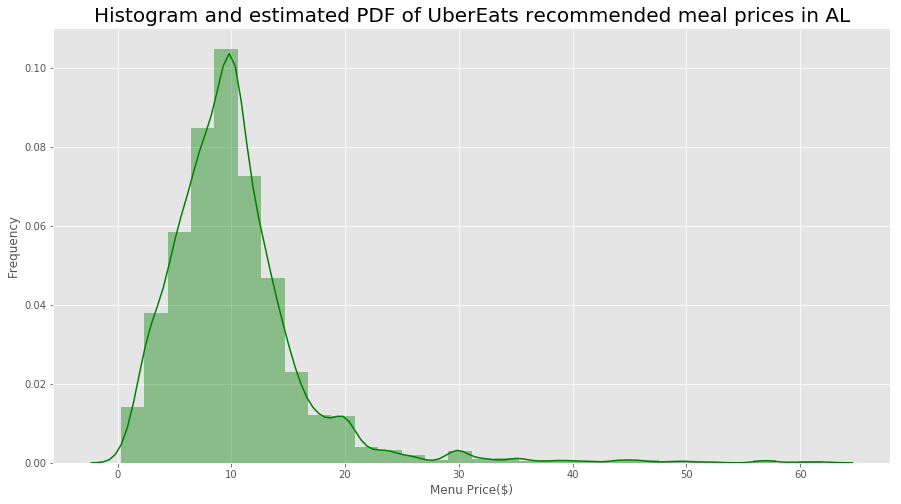

In [213]:
###similar analysis of the distribution of recommended meal prices in AL

fig_dims = (15, 8)
f, ax = plt.subplots(figsize=fig_dims)
hist_df = menu_boxplot[menu_boxplot.sub_menu_title == "Picked For You"]
sns.distplot(hist_df['price($)'], bins=30, color="G", ax=ax)
ax.set_title('Histogram and estimated PDF of UberEats recommended meal prices in AL', fontsize=20)
ax.set(xlabel='Menu Price($)', ylabel='Frequency')


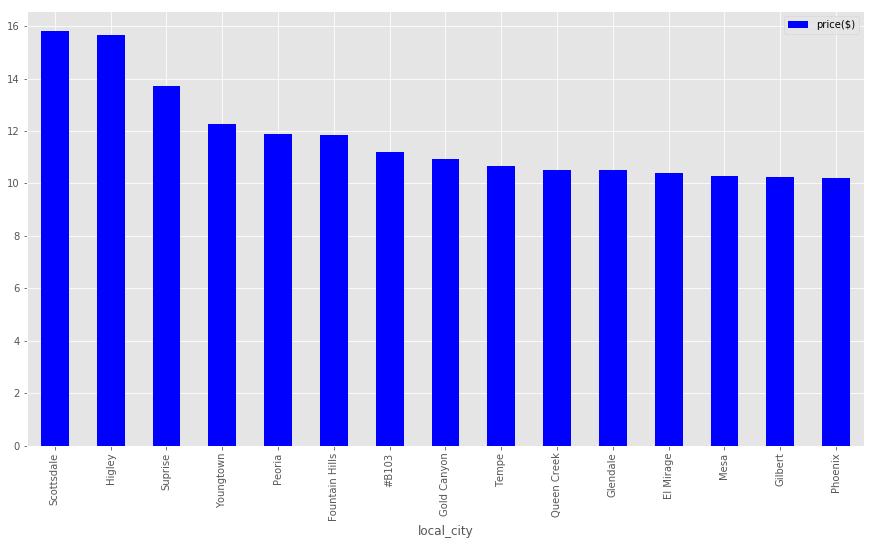

In [216]:
###Further business insights
###how is the mean of recommended meal prices differ across cities with Arizona?
###restaurants in Scottsdale and Higley on average have higher priced meals on the recommended list
state_menu = menu_df[(menu_df.state == "AZ") & (menu_df.sub_menu_title == "Picked For You")]
state_menu[['local_city','price($)']].groupby('local_city').mean().sort_values(ascending=False, by='price($)').head(15).plot(kind='bar', color='b',figsize=(15,8))

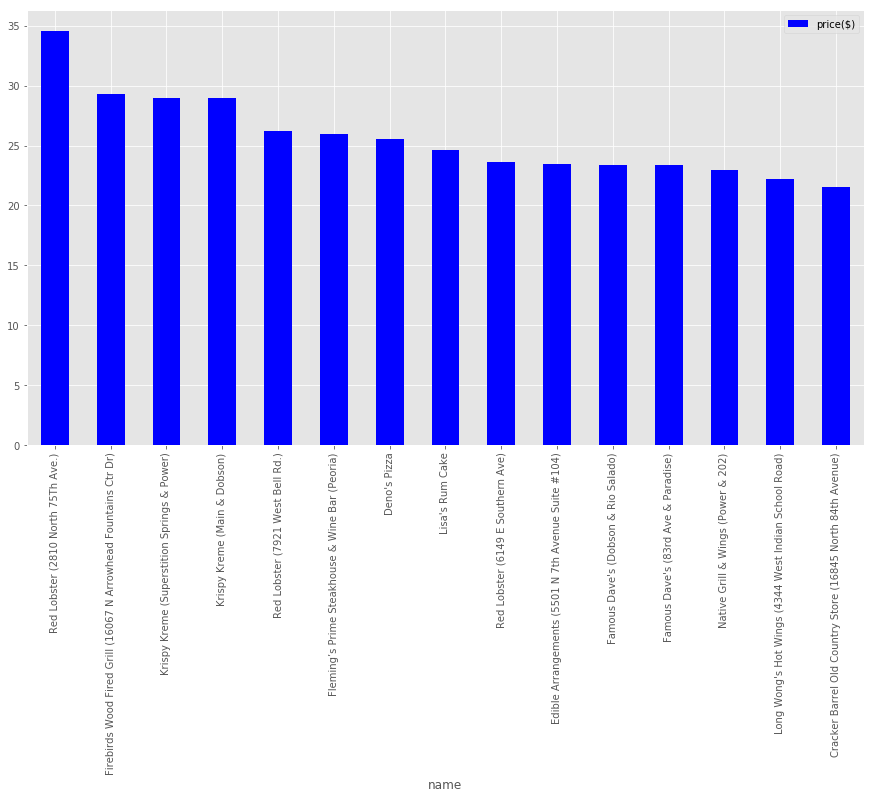

In [217]:
#### Further business insights
###which restaurants have higher recommended meal prices on average in Arizona?
#### surprisingly it's  Red lobster
state_menu = menu_df[(menu_df.state == "AZ") & (menu_df.sub_menu_title == "Picked For You")]
state_menu[['name','price($)']].groupby('name').mean().sort_values(ascending=False, by='price($)').head(15).plot(kind='bar', color='b',figsize=(15,8))

Text(0, 0.5, 'Count')

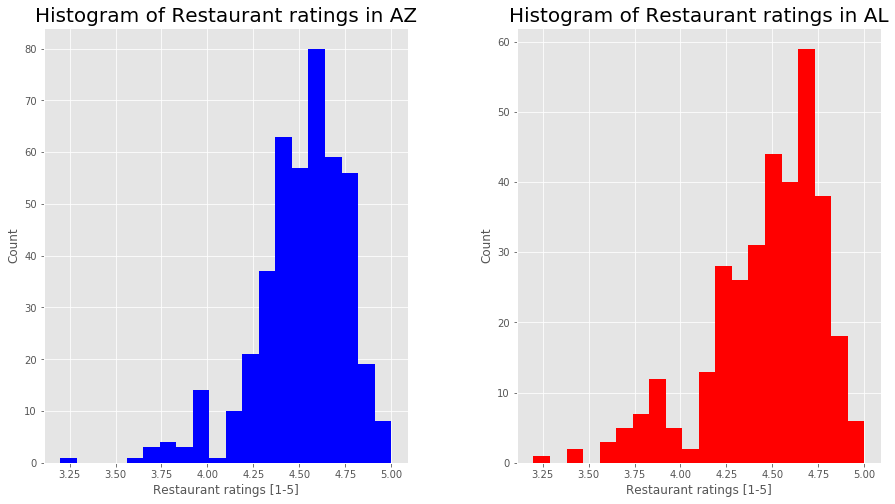

In [131]:
###Business Insight 3:
###How are restaurant reviews distributed in Arizona? also Alabama? would be good to see these side by side
####from graph - most reviews fall between 4.5 - 4.75 in both states which is pretty high

AZ_state_menu = menu_df[(menu_df.state == "AZ")]
AZ_state_menu = AZ_state_menu[['name','ratings']].groupby('name').mean()

AL_state_menu = menu_df[(menu_df.state == "AL")]
AL_state_menu = AL_state_menu[['name','ratings']].groupby('name').mean()
fig_dims = (15, 8)
fig, axes = plt.subplots(1, 2,figsize=fig_dims)
AZ_state_menu.hist('ratings', bins=20, ax=axes[0], color='b', figsize=(15,8))
AL_state_menu.hist('ratings', bins=20, ax=axes[1], color ='r',figsize=(15,8))
axes[0].set_title('Histogram of Restaurant ratings in AZ', fontsize=20)
axes[1].set_title('Histogram of Restaurant ratings in AL', fontsize=20)
axes[0].set_xlabel('Restaurant ratings [1-5]')
axes[1].set_xlabel('Restaurant ratings [1-5]')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')


Text(0.5, 1.0, 'Restaurant Ratings')

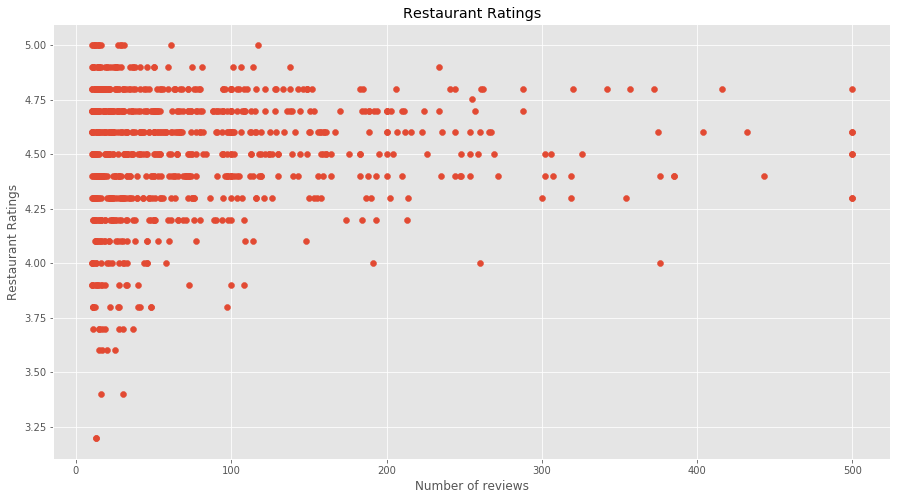

In [147]:
##Business insights 4: Now that we know how ratings stack up, is there a relationship between ratings and no. of reviews?
###Yes, it turns out that for this corpus, the more actively reviewed restaurants have higher ratings with smaller
###variability in ratings. Similar to what we saw in the moviesdb data

review_rating = menu_df[['name','ratings','num_reviews']]
review_rating = review_rating.groupby('name').mean()

fig_dims = (15, 8)
fig, axes = plt.subplots(figsize=fig_dims)

plt.scatter(review_rating['num_reviews'], review_rating['ratings'])
plt.xlabel('Number of reviews')
plt.ylabel('Restaurant Ratings')
plt.title('Restaurant ratings against no. of reviews')

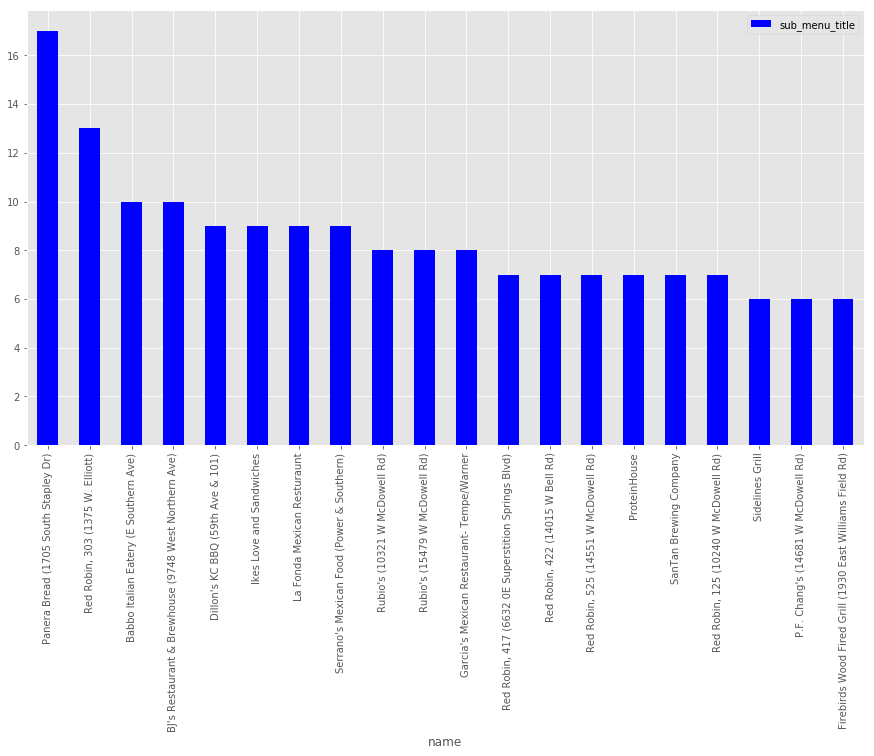

In [168]:
#Customer insight 1: As a parent I would like to know which restaurant has the biggest selection of kids meals?
##typically we will ask this in context of the local city. For this exercise, we would do this across the state of Arizona

###A Panera bread shope takes the cake , followed by Red Robin

AZ_state_menu = menu_df[(menu_df.state == "AZ") & (menu_df.sub_menu_title.str.contains("kid",flags=re.IGNORECASE))]
AZ_state_menu = AZ_state_menu[['name','sub_menu_title']]
AZ_state_menu.groupby("name").count().sort_values(ascending=False, by='sub_menu_title').head(20).plot(kind='bar', color='b',figsize=(15,8))

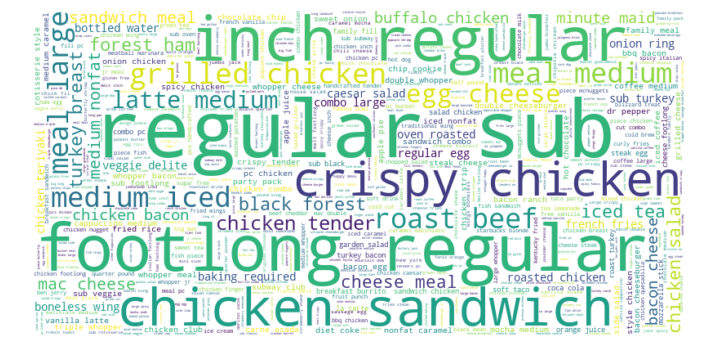

In [175]:
###Other business insights:
###what are the most common dishes across AL and AZ?

###Turns out people love regular footlong (subway) chicken sandwiches

from wordcloud import WordCloud
%matplotlib inline

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)

wc.generate(' '.join(menu_df['dish_name'].str.lower()))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

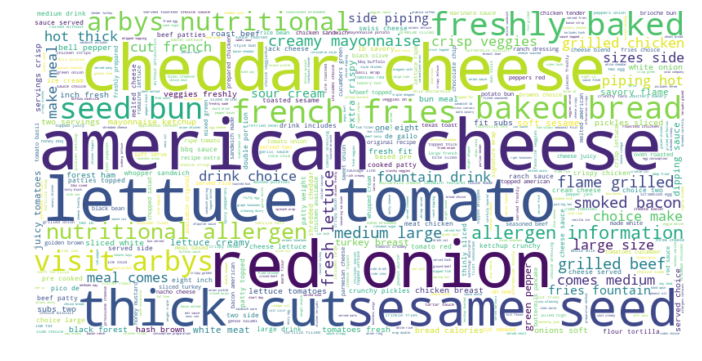

In [177]:
###Other business insights:
###what are the most common main ingredients in dishes across AL and AZ?

###not surprising cheese, lettuce, tomato, red onions that collaborate the finding above(regular footlong chicken sandwich)
###topped off with french fries

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc.generate(' '.join(menu_df['dish_description'].str.lower()))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


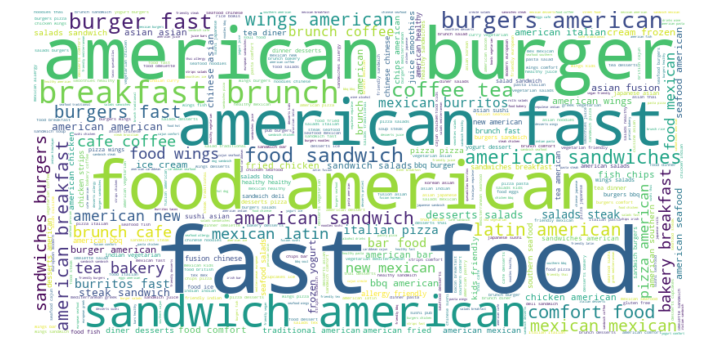

In [185]:
###Other business insights:
###What's the most common food category then AL and AZ?

###not surprising it's fast food - typically called American cuisine - burgers, fries, chicken sandwich, wings

food_cat_df = menu_df['food_category'].apply(lambda text: " ".join(word.lower() for word in text.split(",")))
food_cat_df

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc.generate(' '.join(food_cat_df))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()